# 32130 FDA  Assignment 3 Datamining in Action
autumn 2021


## Part 1 Data Preprocessing and Transformation

#### 1. load the data file

In [1]:
import sklearn as sk
import pandas as pd
import numpy as np

DATAFILE1 = 'D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\Assignment3-TrainingData.csv'
a3training = pd.read_csv(DATAFILE1)
a3training

,Quote_Id,Quote_Date,Quote_Flag,Field_info1,Field_info2,Field_info3,Field_info4,Coverage_info1,Coverage_info2,Coverage_info3,...,Property_info1,Property_info2,Property_info3,Property_info4,Property_info5,Geographic_info1,Geographic_info2,Geographic_info3,Geographic_info4,Geographic_info5
0,2,14/5/14,0,B,0.9153,935,N,5,2,D,...,N,0,D,1,6,2,13,-1,N,CA
1,3,19/6/13,0,J,0.9691,"1,165",N,5,22,F,...,N,0,D,1,8,14,7,-1,N,TX
2,6,6/2/15,0,B,0.9153,935,N,6,22,D,...,N,0,D,1,11,2,12,-1,N,CA
3,9,15/10/14,0,J,0.8793,"1,113",N,1,22,F,...,N,0,O,0,1,14,6,-1,N,TX
4,10,30/3/15,1,F,1.0101,548,N,13,22,E,...,N,0,R,1,25,4,22,-1,N,NJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62575,104296,28/6/13,0,F,0.9919,564,N,4,25,J,...,N,0,R,1,16,4,17,-1,N,NJ
62576,104297,25/1/14,0,F,0.9838,548,N,13,2,E,...,N,0,R,1,18,4,19,-1,N,NJ
62577,104299,24/1/14,0,B,0.9403,935,N,7,22,E,...,N,0,D,0,24,2,8,-1,N,CA
62578,104300,7/12/14,0,J,0.8870,"1,113",N,15,25,G,...,N,0,J,1,23,14,5,-1,N,TX


#### 2. data overview

##### a) Table of number of distinct values, data type, missing value checking

In [2]:
data = {
    'attribute':[],
    'distinct':[],
    'data type':[],
    'missing':[]
}
df = pd.DataFrame(data)                                          # overview table is created

for i in a3training.columns:
    targets = a3training[i].unique()              # get the distinct value of each attribute
    null = pd.isnull(a3training[i]).sum()          # count missing values for each attribute
    df = df.append({'attribute':i, 'distinct':len(targets),        # fill the overview table
                    'data type':str(a3training[i].dtypes), 'missing':null},ignore_index=True)
df.style.format({
    'distinct':'{:.0f}',
    'missing':'{:.0f}'
})


,attribute,distinct,data type,missing
0,Quote_Id,62580,int64,0
1,Quote_Date,868,object,0
2,Quote_Flag,2,int64,0
3,Field_info1,8,object,0
4,Field_info2,38,float64,0
5,Field_info3,8,object,0
6,Field_info4,2,object,0
7,Coverage_info1,26,int64,0
8,Coverage_info2,4,int64,0
9,Coverage_info3,12,object,0


##### b) Target class distribution:

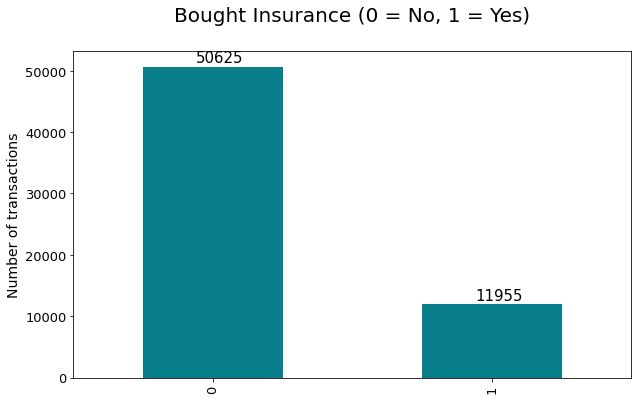

In [3]:
ax = a3training['Quote_Flag'].value_counts().plot(kind='bar', figsize=(10, 6), fontsize=13, color='#087E8B')
ax.set_title('Bought Insurance (0 = No, 1 = Yes)', size=20, pad=30)
ax.set_ylabel('Number of transactions', fontsize=14)

for i in ax.patches:
    ax.text(i.get_x() + 0.19, i.get_height() + 700, str(round(i.get_height(), 2)), fontsize=15)

#### 3. missing value handling
Result:
there are 4 attributes have missing value.
Personal_info1         23,
Personal_info5      29788,
Property_info1         16,
Geographic_info4        1

Instances with missing values in Personal_info1, Property_info1, and Geographic_info4 are deleted, because together they worht less than 0.7% of overall sample.

Although Personal_info5 contains data in type of flost, it is still considered as nominal.
The amount of missing data in Personal_info5 is significant in this attribute. Therefore a new label is assigned to avoid bias.

In [4]:
# a) drop Personal_info1,Property_info1, Geographic_info4 missing instances
a3training1 = a3training.dropna(subset = ["Personal_info1"])
a3training1 = a3training1.dropna(subset = ["Property_info1"])
a3training1 = a3training1.dropna(subset = ["Geographic_info4"])
# null1 = pd.isnull(a3training1).sum()
# print(null1,"\n", len(a3training1))

# b) fill in new lable for Personal_info5, new label = 4
a3training1['Personal_info5'] = a3training1['Personal_info5'].fillna(4)
# a3training1.to_excel("a3training1.xlsx")


# c) Check the handling outcome
print("After missing data handling:")
data = {
    'attribute':[],
    'data type':[],
    'missing0':[],
    'missing1':[],
    'distinct0':[],
    'distinct1':[],
    'distinct diff':[]
    }
df = pd.DataFrame(data)

for i in a3training1.columns:
    targets0 = a3training[i].unique()
    targets1 = a3training1[i].unique()
    null = pd.isnull(a3training[i]).sum()
    null1 = pd.isnull(a3training1[i]).sum()
    diff = len(a3training1[i].unique()) - len(a3training[i].unique())
    df = df.append({'attribute':i, 'data type':str(a3training[i].dtypes),
                    'missing0':null,'missing1':null1,
                    'distinct0':len(targets0),'distinct1':len(targets1),
                     'distinct diff':diff},ignore_index=True)
df.style.format({
    'distinct':'{:.0f}',
    'missing0':'{:.0f}',
    'missing1':'{:.0f}',
    'distinct0':'{:.0f}',
    'distinct1':'{:.0f}',
    'distinct diff':'{:.0f}'
    })
# print(null)
# print("size of dataset: ",len(a3training))

After missing data handling:


,attribute,data type,missing0,missing1,distinct0,distinct1,distinct diff
0,Quote_Id,int64,0,0,62580,62540,-40
1,Quote_Date,object,0,0,868,868,0
2,Quote_Flag,int64,0,0,2,2,0
3,Field_info1,object,0,0,8,8,0
4,Field_info2,float64,0,0,38,38,0
5,Field_info3,object,0,0,8,8,0
6,Field_info4,object,0,0,2,2,0
7,Coverage_info1,int64,0,0,26,26,0
8,Coverage_info2,int64,0,0,4,4,0
9,Coverage_info3,object,0,0,12,12,0


distinct value reduction in Quote_Id is normal
distinct value reduction in Sales_info5 is acceptable, the amount = 9/36103 < 0.025%
distinct value reduction in Personal_info1 and Property_info1 is simply due to removing the label "missing"
distinct value reduction in Geographic_info1 and Geographic_info2 is due to the removal of the instance missing value in Geographic_info4
note that the caption instance are the only on denoted "-1" in both Geographic_info1 and Geographic_info2
Therefore, the instance should be treated seperately, and not be included in classification.
The overall result of missing data handling is satisfied.

#### 1.4 data transformation


#### a) Binarization

In [5]:
# 1)binary label
# targets = ['Field_info4','Personal_info1','Property_info1','Geographic_info3','Geographic_info4']
a3training1['Field_info4'] = [0 if x == 'N' else 1 for x in a3training1['Field_info4']]
a3training1['Personal_info1'] = [0 if x == 'N' else 1 for x in a3training1['Personal_info1']]
a3training1['Property_info1'] = [0 if x == 'N' else 1 for x in a3training1['Property_info1']]
a3training1['Geographic_info3'] = [0 if x == -1 else 1 for x in a3training1['Geographic_info3']]
a3training1['Geographic_info4'] = [0 if x == 'N' else 1 for x in a3training1['Geographic_info4']]

# 2)multi label
# targets = ['Field_info1','Field_info3','Coverage_info3','Sales_info4','Personal_info3',
#            'Property_info3','Geographic_info5']

# Create dummy variables
dummy_Field_info1 = pd.get_dummies(a3training1['Field_info1'], prefix='Field_1', drop_first=False)
dummy_Field_info3 = pd.get_dummies(a3training1['Field_info3'], prefix='Field_3', drop_first=False)
dummy_Coverage_info3 = pd.get_dummies(a3training1['Coverage_info3'], prefix='Cover_1', drop_first=False)
dummy_Sales_info4 = pd.get_dummies(a3training1['Sales_info4'], prefix='Sale_4', drop_first=False)
dummy_Personal_info3 = pd.get_dummies(a3training1['Personal_info3'], prefix='Personal_3', drop_first=False)
dummy_Personal_info5 = pd.get_dummies(a3training1['Personal_info5'], prefix='Personal_5', drop_first=False)
dummy_Property_info3 = pd.get_dummies(a3training1['Property_info3'], prefix='Property_3', drop_first=False)
dummy_Geographic_info5 = pd.get_dummies(a3training1['Geographic_info5'], prefix='Geo_5', drop_first=False)


#### b) Quote_Date

In [6]:
dummy_Quote_Date = pd.to_datetime(a3training1['Quote_Date'])
dummy_Quote_Month = dummy_Quote_Date.dt.month
dummy_Quote_Year = dummy_Quote_Date.dt.year

#### c) Merger

In [7]:
# Drop unnecessary columns
to_drop = ['Quote_Date', 'Field_info1', 'Field_info3', 'Coverage_info3', 'Sales_info4',
           'Personal_info3', 'Personal_info5', 'Property_info3', 'Geographic_info5', 'Property_info2']
a3training1.drop(to_drop, axis=1, inplace=True)

# Merge into a single data frame
merged = pd.concat([a3training1, dummy_Field_info1, dummy_Field_info3, dummy_Coverage_info3, 
                    dummy_Personal_info3, dummy_Personal_info5, 
                    dummy_Property_info3, dummy_Geographic_info5 
                    ], axis=1)
merged['Quote_Year'] = dummy_Quote_Year
merged['Quote_Month'] = dummy_Quote_Month

# Move target attribute to the end
merged = merged[[col for col in merged.columns if col != 'Quote_Flag'] + ['Quote_Flag']]
merged.head()


,Quote_Id,Field_info2,Field_info4,Coverage_info1,Coverage_info2,Sales_info1,Sales_info2,Sales_info3,Sales_info5,Personal_info1,...,Property_3_Q,Property_3_R,Property_3_S,Geo_5_CA,Geo_5_IL,Geo_5_NJ,Geo_5_TX,Quote_Year,Quote_Month,Quote_Flag
0,2,0.9153,0,5,2,1,5,11,55101,0,...,0,0,0,1,0,0,0,2014,5,0
1,3,0.9691,0,5,22,1,5,1,5476,0,...,0,0,0,0,0,0,1,2013,6,0
2,6,0.9153,0,6,22,1,5,11,59655,0,...,0,0,0,1,0,0,0,2015,6,0
3,9,0.8793,0,1,22,1,5,11,6943,0,...,0,0,0,0,0,0,1,2014,10,0
4,10,1.0101,0,13,22,1,3,20,61148,0,...,0,1,0,0,0,1,0,2015,3,1


In [8]:
data = {
    'attribute':[],
    'distinct':[],
    'data type':[],
    'missing':[]
}
df = pd.DataFrame(data)                                          # overview table is created

for i in merged.columns:
    targets = merged[i].unique()              # get the distinct value of each attribute
    null = pd.isnull(merged[i]).sum()          # count missing values for each attribute
    df = df.append({'attribute':i, 'distinct':len(targets),        # fill the overview table
                    'data type':str(merged[i].dtypes), 'missing':null},ignore_index=True)
df.style.format({
    'distinct':'{:.0f}',
    'missing':'{:.0f}'
})


,attribute,distinct,data type,missing
0,Quote_Id,62540,int64,0
1,Field_info2,38,float64,0
2,Field_info4,2,int64,0
3,Coverage_info1,26,int64,0
4,Coverage_info2,4,int64,0
5,Sales_info1,2,int64,0
6,Sales_info2,5,int64,0
7,Sales_info3,23,int64,0
8,Sales_info5,36094,int64,0
9,Personal_info1,2,int64,0


#### d) Export

In [9]:
merged.to_csv("D:\\Google One\\8. Library\\0. UTS\\Master of Information Technology\\4. Subjects\\2021 Semester 1\\32130 Fundamentals of Data Analystics\\4. Assignment\\Assignment 3\\Database\\A3TrainingData-clean_dummy.csv")
